In [ ]:
%pip install conll-df

In [336]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '../data/ler/ler.conll'

Datei einlesen, Index ab 1 => Index == Zeile

In [337]:
#no nan values
df = pd.read_csv(path, sep=' ', header=None, names=['token','tag'], quoting=csv.QUOTE_NONE)

# new index start at 1 not 0
df.index = np.arange(1,len(df)+1) 

# with nan values
#df = pd.read_csv(path, sep=' ', header=None, names=['token','tag'], quoting=csv.QUOTE_NONE,skip_blank_lines=False) 

# nan values and #lines
#df = pd.read_csv(path, sep=' ', header=None, names=['token','tag'], quoting=csv.QUOTE_NONE,skip_blank_lines=False,nrows=100000) 

# For better plotting combine I-tags and B-tags
df['tag'] = df['tag'].str.replace("I-","")
df['tag'] = df['tag'].str.replace("B-","")

Übersicht der Daten

In [338]:
df.head(50)

,token,tag
1,Prozesskostenhilfe,O
2,-,O
3,Entschädigung,O
4,für,O
5,überlange,O
6,Verfahrensdauer,O
7,-,O
8,Revisionsverfahren,O
9,Der,O
10,Antrag,O


# Analyse der Tokens
Erzeugen eines neues Datenframes, tags separiert in Spalten, 'O'-Tag entfernt

In [339]:
tokenexamples = df.groupby('tag')['token'].apply(list)
df_token = pd.DataFrame(tokenexamples.tolist())
df_token = df_token.T
df_token.columns=['Anwälte','Europäische Normen','Gerichte','Gesetze','Institutionen','Länder','Landschaftsbezeichnungen','Rechtsliteratur','Marken','O','Organisationen','Personen','Richter','Rechtsprechungen','Städte','Straßen','Unternehmen','Verordnungen','Vorschriften','Verträge']
df_token.drop('O', axis=1, inplace=True)

In [340]:
df_token.head(50)

,Anwälte,Europäische Normen,Gerichte,Gesetze,Institutionen,Länder,Landschaftsbezeichnungen,Rechtsliteratur,Marken,Organisationen,Personen,Richter,Rechtsprechungen,Städte,Straßen,Unternehmen,Verordnungen,Vorschriften,Verträge
0,F,Art.,Achten,§,Deutschen,Bundesrepublik,A,BT-Drs.,„,Handwerksverband,F,Linck,Verfahrens,A,„,K,Verordnung,Eingruppierungserlass,BAT
1,Kokott,6,Senats,114,Rentenversicherung,Deutschland,Afrika,17/3802,K,Metallbau,F,Biebl,vor,Herne,P-Platzes,AG,über,Niedersachsen,TV-L
2,Sharpston,Abs.,des,Abs.,EZB,Kolumbien,Südliches,S.,“,und,F,Volk,dem,Herne,“,I,Masterabschlüsse,Eingruppierungserlasses,Teils
3,F.,1,Bundesarbeitsgerichts,1,Innenverwaltung,Deutschlands,Afrika,18,VW,Feinwerktechnik,F,Fischermeier,Bundesarbeitsgericht,Herne,Kstraße,AG,für,des,B
4,...,EMRK,Bundesarbeitsgericht,Satz,des,Niedersachsen,Afrika,Meyer-Ladewig,Tiguan,Baden-Württemberg,F,Spelge,zum,Herne,Kstraße,I,Lehrämter,Nds.,der
5,...,Art.,Bundesgerichtshof,1,Landes,Kolumbien,Afrika,/,VW,Industriegewerkschaft,F,Heinkel,Aktenzeichen,Herne,Kstraße,AG,in,Kultusministeriums,Anlage
6,...,6,Bundesarbeitsgericht,ZPO,Nordrhein-Westfalen,Deutschlands,M,Harrendorf,Tiguan,Metall,M,Gallner,-,Gaborone,Kstraße,I,Niedersachsen,Runderlass,2
7,...,EMRK,Europäische,§,Bundesanstalt,Bundesrepublik,M,/,„,Unternehmerverband,H,Brune,8,B,Kstraße,GmbH,Nds.,des,zum
8,...,Art.,Gerichtshof,198,für,Deutschland,M,König,Hugo,Metall,Z,Schlünder,AZR,O.,Kstraße,I,MasterVO-Lehr,Kultusministeriums,TVÜ-Länder
9,...,267,für,Abs.,Finanzdienstleistungsaufsicht,Niedersachsen,M,in,Boss,Baden-Württemberg,Z,M.,418/15,W,Y-Straße,AG,Nds.,vom,Teils


* hauptsächlich anonymisiert: 
    * Anwälte
    * Personen
    * Unternehmen
* ausgeschrieben als auch gekürzt:
    * Landschaftsbezeichnungen
    * Städte
    * Straßen
* was bleibt:
    * Europäische Normen
    * Gerichte
    * Gesetze
    * Institutionen
    * Länder
    * Rechtsliteratur
    * Marken
    * Organisationen
    * Richternamen
    * Rechtssprechungen
    * Verordnungen
    * Vorschriften
    * Verträge

# Analyse der Tokenverteilung

In [341]:
tags = df.groupby(['tag']).count().sort_values(["token"],ascending=False)
tags = tags.loc[(tags['token'] < 200000)] # tag 0 entfernt #O = 1743959
fulltags = ['Rechtsprechungen','Gesetze','Rechtsliteratur','Verträge','Europäische Normen','Institutionen','Gerichte','Verordnungen','Vorschriften','Organisationen','Unternehmen','Personen','Länder','Richter','Städte','Marken','Straßen','Landschaftsbezeichnungen','Anwälte']
tags['fulltags'] = fulltags
tags

,token,fulltags
tag,,
RS,194601,Rechtsprechungen
GS,116934,Gesetze
LIT,38119,Rechtsliteratur
VT,15227,Verträge
EUN,12520,Europäische Normen
INN,6872,Institutionen
GRT,5981,Gerichte
VO,5238,Verordnungen
VS,4702,Vorschriften


In [342]:
tokenSum = tags['token'].sum()
"{}{}".format("Gesamtanzahl der (nicht O)-Tokens: ", tokenSum)

'Gesamtanzahl der (nicht O)-Tokens: 413082'

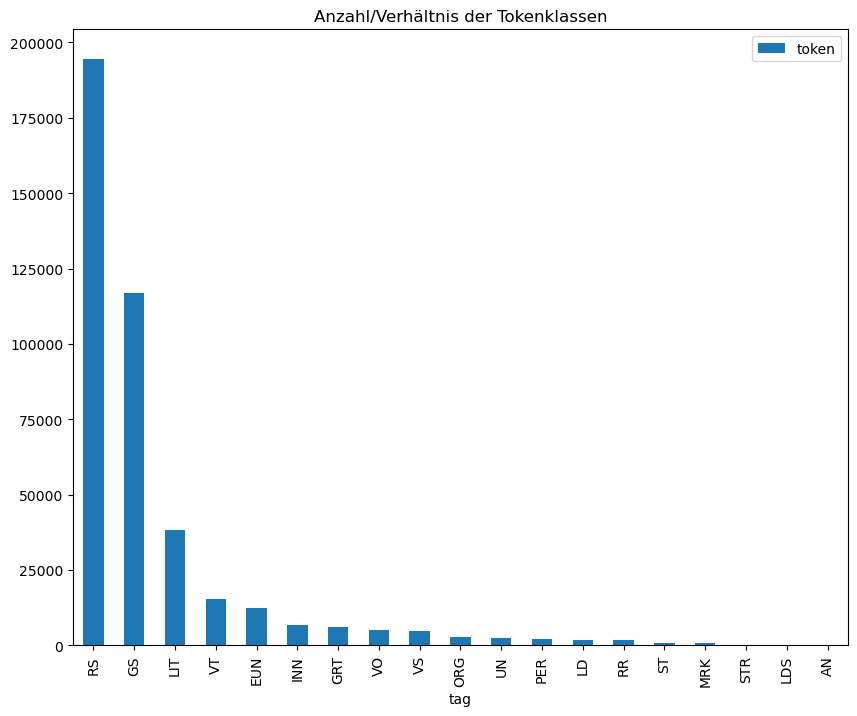

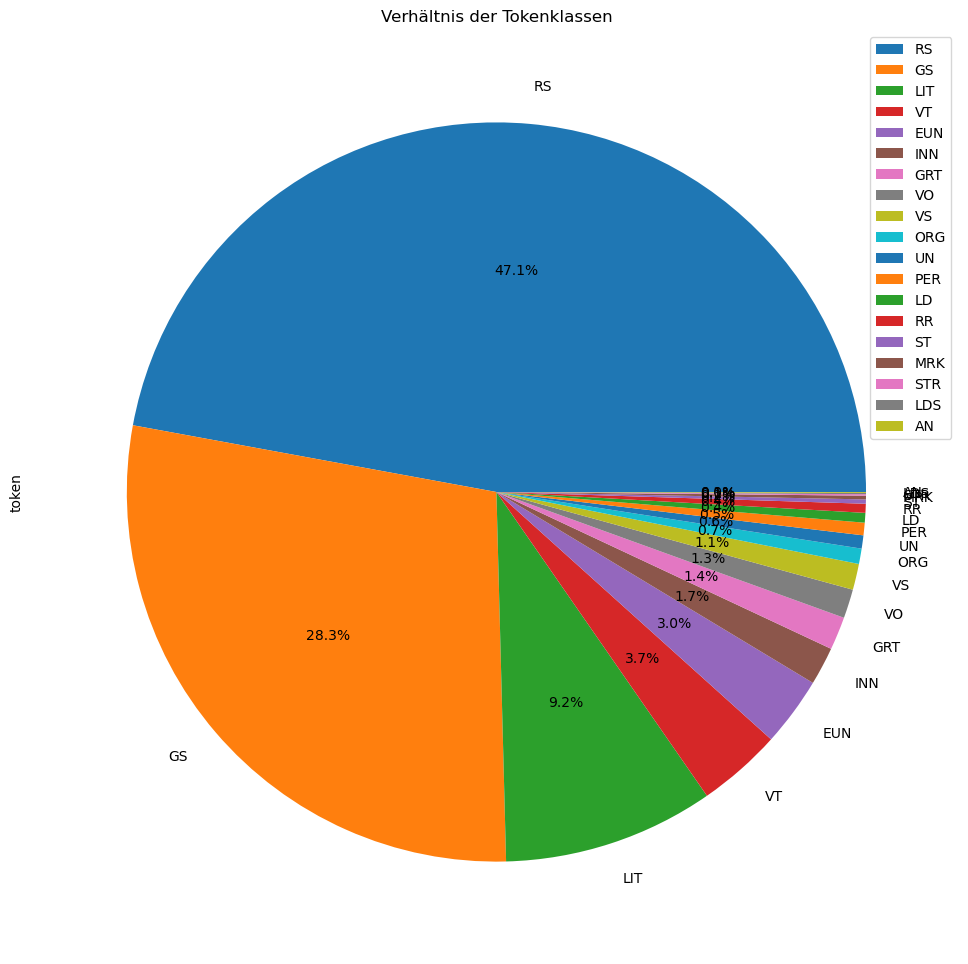

In [343]:
plot1 = tags.plot.bar(y='token', title='Anzahl/Verhältnis der Tokenklassen', figsize=(10,8))
plot2 = tags.plot.pie(y='token', title='Verhältnis der Tokenklassen', autopct='%1.1f%%', figsize=(14,12))


# Entferne nun die drei größten Tokenklassen für bessere Übersicht

In [344]:
#tags = tags.loc[(tags['token'] < 190000)] # tag RS entfernt #RS = 194601
#tags = tags.loc[(tags['token'] < 98413)] # tag RS,GS entfernt #GS = 116934
tags = tags.loc[(tags['token'] < 35000)] # tag RS,GS,LIT entfernt #LIT = 38119
newfulltags = ['Verträge','Europäische Normen','Institutionen','Gerichte','Verordnungen','Vorschriften','Organisationen','Unternehmen','Personen','Länder','Richter','Städte','Marken','Straßen','Landschaftsbezeichnungen','Anwälte']
tags['fulltags'] = newfulltags
tags

/tmp/ipykernel_16957/1691451893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags['fulltags'] = newfulltags


,token,fulltags
tag,,
VT,15227,Verträge
EUN,12520,Europäische Normen
INN,6872,Institutionen
GRT,5981,Gerichte
VO,5238,Verordnungen
VS,4702,Vorschriften
ORG,2771,Organisationen
UN,2384,Unternehmen
PER,2262,Personen


In [345]:
tokenSum = tags['token'].sum()
"{}{}{}".format("Anzahl der gefilterten Tokens: ", tokenSum,". Es fehlen die Tokens: O, RS, GS, LIT")

'Anzahl der gefilterten Tokens: 63428. Es fehlen die Tokens: O, RS, GS, LIT'

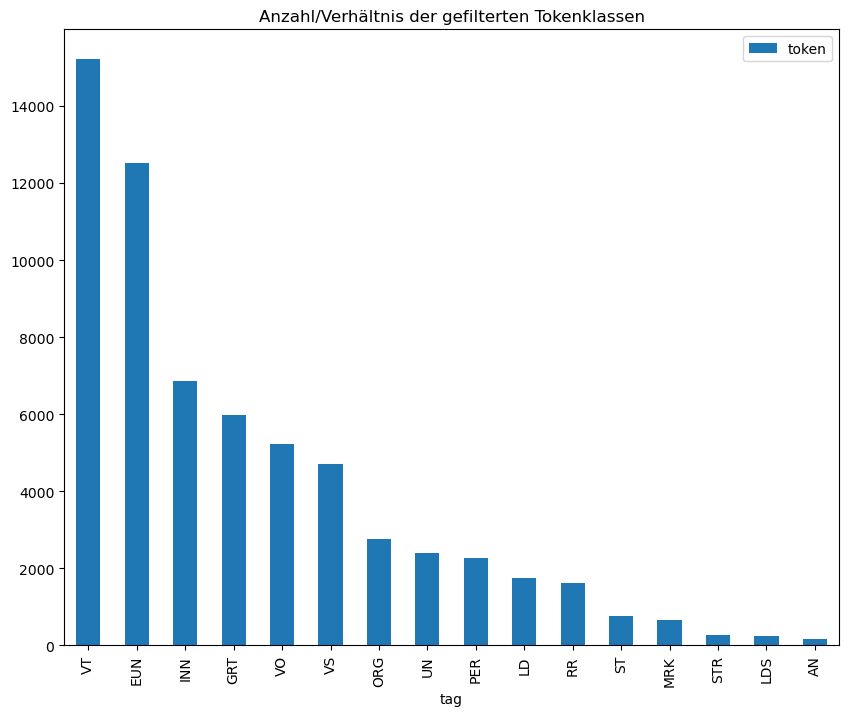

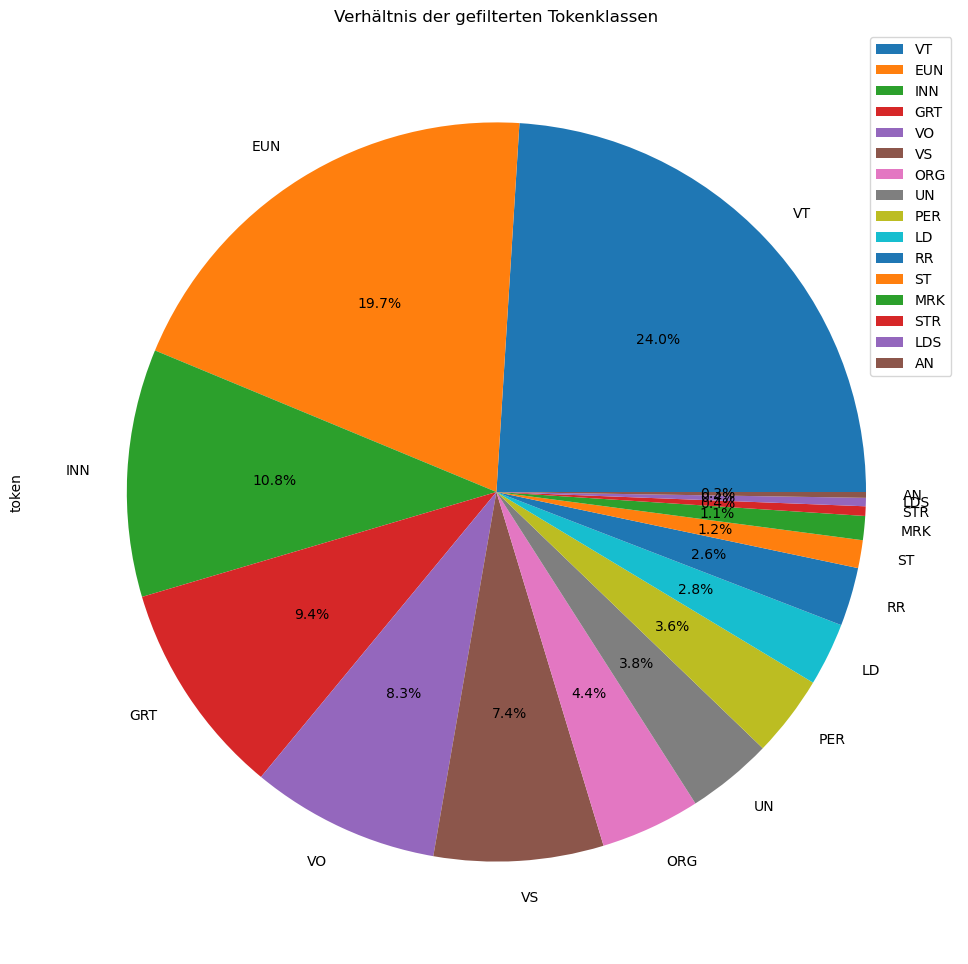

In [346]:
plot1 = tags.plot.bar(y='token', title='Anzahl/Verhältnis der gefilterten Tokenklassen', figsize=(10,8),)
plot2 = tags.plot.pie(y='token', title='Verhältnis der gefilterten Tokenklassen', autopct='%1.1f%%', figsize=(14,12))

In [347]:
# Kleine Hilfe zum überprüfen ob token (mit index x) in selbe Zeile x im Datensatz steht.
# stimmt nur, wenn NaN values (oder etwas anderes) für leere zeilen aus Datensatz eingelesen wurden
df.iloc[lambda x: x.index == 71973] 

,token,tag
71973,Geriatrie,O
